<h1 style='color: green; font-size: 36px; font-weight: bold;'>Data Science - Regressão Linear</h1>

# <font color='red' style='font-size: 30px;'>Conhecendo o Dataset</font>
<hr style='border: 2px solid red;'>

## Importando bibliotecas

In [1]:
import matplotlib.pyplot as plt
import pandas            as pd
import numpy             as np

## O Dataset e o Projeto
<hr>

### Fonte: https://www.kaggle.com/greenwing1985/housepricing

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Nosso objetivo neste exercício é criar um modelo de machine learning, utilizando a técnica de Regressão Linear, que faça previsões sobre os preços de imóveis a partir de um conjunto de características conhecidas dos imóveis.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Vamos utilizar um dataset disponível no Kaggle que foi gerado por computador para treinamento de machine learning para iniciantes. Este dataset foi modificado para facilitar o nosso objetivo, que é fixar o conhecimento adquirido no treinamento de Regressão Linear.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Siga os passos propostos nos comentários acima de cada célular e bons estudos.</p>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>precos</b> - Preços do imóveis</li>
    <li><b>area</b> - Área do imóvel</li>
    <li><b>garagem</b> - Número de vagas de garagem</li>
    <li><b>banheiros</b> - Número de banheiros</li>
    <li><b>lareira</b> - Número de lareiras</li>
    <li><b>marmore</b> - Se o imóvel possui acabamento em mármore branco (1) ou não (0)</li>
    <li><b>andares</b> - Se o imóvel possui mais de um andar (1) ou não (0)</li>
</ul>

## Leitura dos dados

Dataset está na pasta "Dados" com o nome "HousePrices_HalfMil.csv" em usa como separador ";".

In [6]:
df_imoveis = pd.read_csv('../dados/HousePrices_HalfMil.csv', sep=';')

## Visualizar os dados

In [7]:
df_imoveis.head()

,precos,area,garagem,banheiros,lareira,marmore,andares
0,51875,25,3,4,3,0,1
1,17875,35,1,3,1,0,0
2,47075,195,2,4,2,0,0
3,38575,33,2,2,1,0,1
4,33775,11,2,3,0,0,1


## Verificando o tamanho do dataset

In [8]:
df_imoveis.shape

(1000, 7)

# <font color='red' style='font-size: 30px;'>Análises Preliminares</font>
<hr style='border: 2px solid red;'>

## Estatísticas descritivas

In [11]:
df_imoveis.describe().round(2)

,precos,area,garagem,banheiros,lareira,marmore,andares
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,41985.60,124.33,2.01,3.00,2.03,0.33,0.48
std,12140.39,72.39,0.81,1.43,1.42,0.47,0.50
min,13150.00,1.00,1.00,1.00,0.00,0.00,0.00
25%,33112.50,60.75,1.00,2.00,1.00,0.00,0.00
50%,41725.00,123.00,2.00,3.00,2.00,0.00,0.00
75%,51175.00,187.00,3.00,4.00,3.00,1.00,1.00
max,73675.00,249.00,3.00,5.00,4.00,1.00,1.00


## Matriz de correlação

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>coeficiente de correlação</b> é uma medida de associação linear entre duas variáveis e situa-se entre <b>-1</b> e <b>+1</b> sendo que <b>-1</b> indica associação negativa perfeita e <b>+1</b> indica associação positiva perfeita.</p>

### Observe as correlações entre as variáveis:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>Quais são mais correlacionadas com a variável dependete (Preço)?</li>
    <li>Qual o relacionamento entre elas (positivo ou negativo)?</li>
    <li>Existe correlação forte entre as variáveis explicativas?</li>
</ul>

In [19]:
df_imoveis.corr().round(2)

,precos,area,garagem,banheiros,lareira,marmore,andares
precos,1.00,0.12,0.10,0.12,0.11,0.43,0.63
area,0.12,1.00,-0.01,-0.01,0.01,-0.02,-0.02
garagem,0.10,-0.01,1.00,0.07,0.06,-0.02,-0.02
banheiros,0.12,-0.01,0.07,1.00,0.05,-0.03,-0.02
lareira,0.11,0.01,0.06,0.05,1.00,0.03,-0.00
marmore,0.43,-0.02,-0.02,-0.03,0.03,1.00,-0.01
andares,0.63,-0.02,-0.02,-0.02,-0.00,-0.01,1.00


# <font color='red' style='font-size: 30px;'>Comportamento da Variável Dependente (Y)</font>
<hr style='border: 2px solid red;'>

# Análises gráficas

<img width='700px' src='../Dados/img/Box-Plot.png'>

## Importando biblioteca seaborn

In [20]:
import seaborn as sns

## Configure o estilo e cor dos gráficos (opcional)

In [21]:
# style => darkgrid, whitegrid, dark, white, and ticks
sns.set_style('darkgrid')

# palette => configurando como coolwarm
sns.set_palette('Set3')

## Box plot da variável *dependente* (y)


### Avalie o comportamento da distribuição da variável dependente:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>Parecem existir valores discrepantes (outliers)?</li>
    <li>O box plot apresenta alguma tendência?</li>
</ul>

https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

<AxesSubplot:title={'center':'Preços do Imóveis]'}, xlabel='$'>

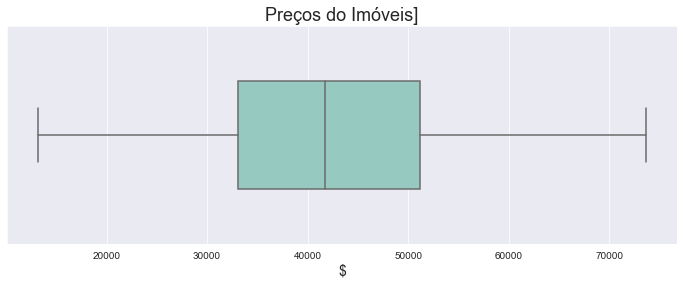

In [23]:
ax = sns.boxplot(x='precos', data=df_imoveis, orient='h', width=0.5)
ax.figure.set_size_inches(12, 4)
ax.set_title('Preços do Imóveis]', fontsize=18)
ax.set_xlabel('$', fontsize=14)
ax

## Investigando a variável *dependente* (y) juntamente com outras característica

Faça um box plot da variável dependente em conjunto com cada variável explicativa (somente as categóricas).

### Avalie o comportamento da distribuição da variável dependente com cada variável explicativa categórica:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>As estatísticas apresentam mudança significativa entre as categorias?</li>
    <li>O box plot apresenta alguma tendência bem definida?</li>
</ul>

### Box-plot (Preço X Garagem)

<AxesSubplot:title={'center':'Preços dos Imóveis'}, xlabel='$', ylabel='Garagem'>

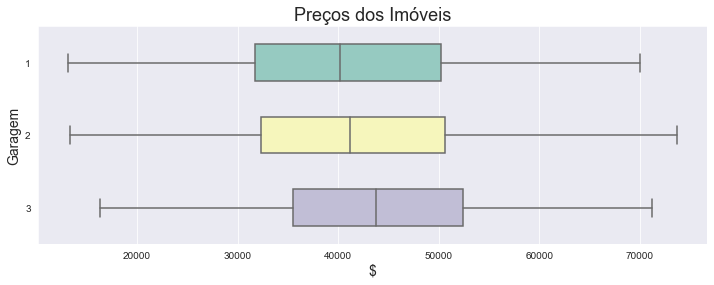

In [25]:
ax = sns.boxplot(x='precos', y='garagem', data=df_imoveis, orient='h', width=0.5)
ax.figure.set_size_inches(12, 4)
ax.set_title('Preços dos Imóveis', fontsize=18)
ax.set_xlabel('$', fontsize=14)
ax.set_ylabel('Garagem'  , fontsize=14)
ax

<font color='red'>Não apresentou outliers. Casas com 3 vagas de garagem possuem um preço inicial maior que outras casas, mas não não é o motivo para casa mais casa da base de dados.</font>

### Box-plot (Preço X Banheiros)

<AxesSubplot:title={'center':'Preços dos Imóveis'}, xlabel='$', ylabel='Banheiros'>

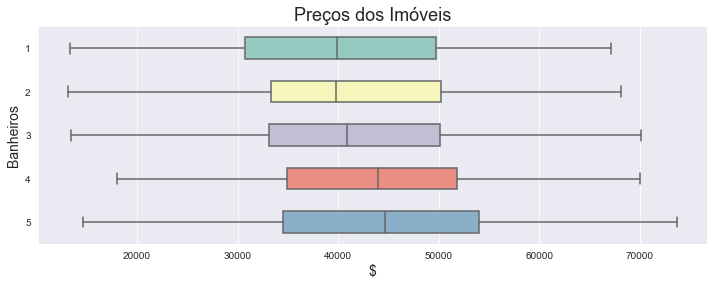

In [26]:
ax = sns.boxplot(x='precos', y='banheiros', data=df_imoveis, orient='h', width=0.5)
ax.figure.set_size_inches(12, 4)
ax.set_title('Preços dos Imóveis', fontsize=18)
ax.set_xlabel('$', fontsize=14)
ax.set_ylabel('Banheiros'  , fontsize=14)
ax

<font color='red'>Não apresentou outliers. Apresentou correlação, into é, quanto mais banheiros maior o preço médio do imóvel.</font>

### Box-plot (Preço X Lareira)

<AxesSubplot:title={'center':'Preços dos Imóveis'}, xlabel='$', ylabel='Lareira'>

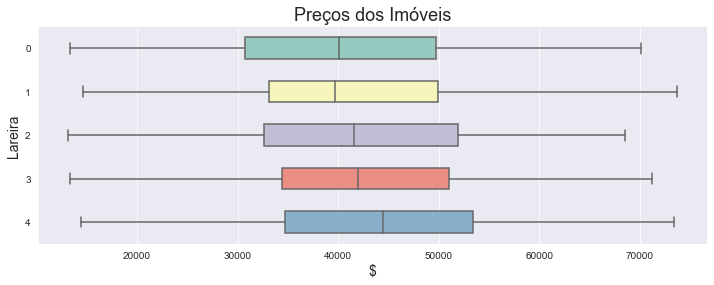

In [27]:
ax = sns.boxplot(x='precos', y='lareira', data=df_imoveis, orient='h', width=0.5)
ax.figure.set_size_inches(12, 4)
ax.set_title('Preços dos Imóveis', fontsize=18)
ax.set_xlabel('$', fontsize=14)
ax.set_ylabel('Lareira'  , fontsize=14)
ax

<font color='red'>Não apresentou outliers. Apresentou correlação, into é, quanto mais lareiras maior o preço médio do imóvel.</font>

### Box-plot (Preço X Acabamento em Mármore)

<AxesSubplot:title={'center':'Preços dos Imóveis'}, xlabel='$', ylabel='Marmore'>

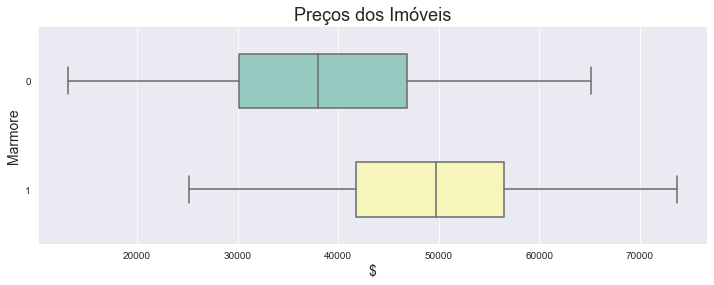

In [28]:
ax = sns.boxplot(x='precos', y='marmore', data=df_imoveis, orient='h', width=0.5)
ax.figure.set_size_inches(12, 4)
ax.set_title('Preços dos Imóveis', fontsize=18)
ax.set_xlabel('$', fontsize=14)
ax.set_ylabel('Marmore'  , fontsize=14)
ax

<font color='red'>Não apresentou outliers. Apresentou correlação, into é, casas com acabamento em mármore possuem os maiores preços.</font>

### Box-plot (Preço X Andares)

<AxesSubplot:title={'center':'Preços dos Imóveis'}, xlabel='$', ylabel='Andares'>

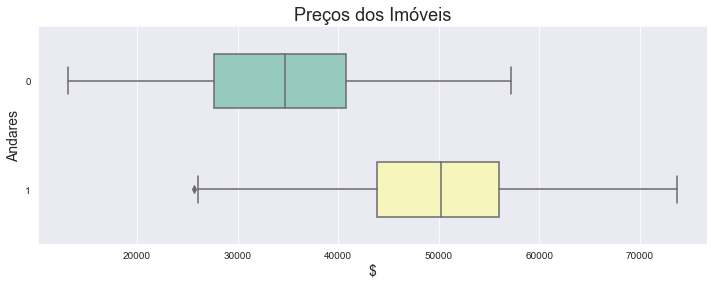

In [29]:
ax = sns.boxplot(x='precos', y='andares', data=df_imoveis, orient='h', width=0.5)
ax.figure.set_size_inches(12, 4)
ax.set_title('Preços dos Imóveis', fontsize=18)
ax.set_xlabel('$', fontsize=14)
ax.set_ylabel('Andares'  , fontsize=14)
ax

<font color='red'>Apresentou outliers leve, será mantido na base de dados. Apresentou correlação, into é, casas mais de um andar possuem os maiores preços.</font>

## Distribuição de frequências da variável *dependente* (y)

Construa um histograma da variável dependente (Preço).

### Avalie:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>A distribuição de frequências da variável dependente parece ser assimétrica?</li>
    <li>É possível supor que a variável dependente segue uma distribuição normal?</li>
</ul>

https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot

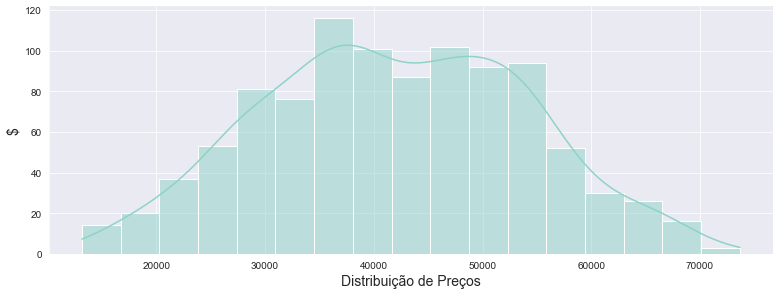

In [31]:
ax = sns.displot(df_imoveis['precos'], kde=True)
ax.figure.set_size_inches(12, 4)
ax.set_axis_labels('Distribuição de Preços', '$' , fontsize=14)
ax

<font color='red'>Possue leve assimetria, será considerado como distribuição normal.</font>

## Gráficos de dispersão entre as variáveis do dataset

## Plotando o pairplot fixando somente uma variável no eixo y

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

Plote gráficos de dispersão da variável dependente contra cada variável explicativa. Utilize o pairplot da biblioteca seaborn para isso.

Plote o mesmo gráfico utilizando o parâmetro kind='reg'.

### Avalie:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>É possível identificar alguma relação linear entre as variáveis?</li>
    <li>A relação é positiva ou negativa?</li>
    <li>Compare com os resultados obtidos na matriz de correlação.</li>
</ul>

In [32]:
df_imoveis.columns

Index(['precos', 'area', 'garagem', 'banheiros', 'lareira', 'marmore',
       'andares'],
      dtype='object')

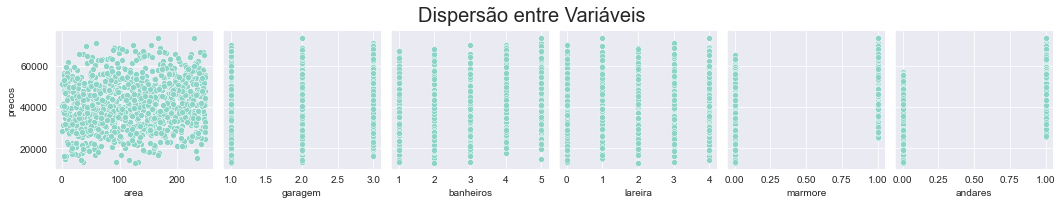

In [33]:
ax = sns.pairplot(df_imoveis, x_vars=['area', 'garagem', 'banheiros', 'lareira', 'marmore', 'andares'], y_vars=["precos"]);
ax.fig.suptitle('Dispersão entre Variáveis', fontsize=20, y=1.1)
ax

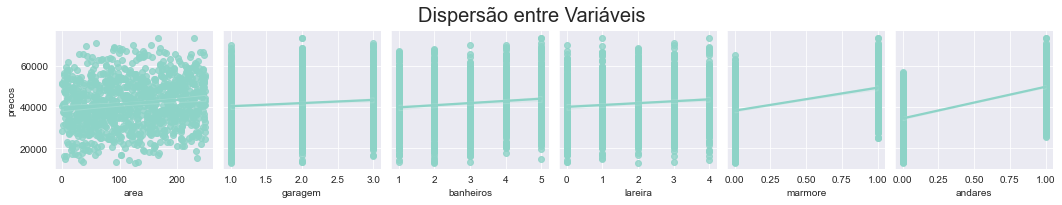

In [34]:
ax = sns.pairplot(df_imoveis, x_vars=['area', 'garagem', 'banheiros', 'lareira', 'marmore', 'andares'], y_vars=["precos"], kind='reg');
ax.fig.suptitle('Dispersão entre Variáveis', fontsize=20, y=1.1)
ax

# <font color='red' style='font-size: 30px;'>Estimando um Modelo de Regressão Linear</font>
<hr style='border: 2px solid red;'>

## Importando o *train_test_split* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [35]:
from sklearn.model_selection import train_test_split

## Criando uma Series (pandas) para armazenar a variável dependente (y)

In [45]:
X = df_imoveis[['area', 'garagem', 'banheiros', 'lareira', 'marmore', 'andares']]

## Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X)

In [46]:
y = df_imoveis['precos']

## Criando os datasets de treino e de teste

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

## Importando *LinearRegression* e *metrics* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/classes.html#regression-metrics

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn              import metrics

## Instanciando a classe *LinearRegression()*

In [50]:
modelo_reg = LinearRegression()

## Utilizando o método *fit()* para estimar o modelo linear utilizando os dados de TREINO (y_train e X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [51]:
modelo_reg.fit(X_train, y_train)

LinearRegression()

## Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score


### Avalie:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>O modelo apresenta um bom ajuste?</li>
    <li>Você lembra o que representa o R²?</li>
    <li>Qual medida podemos tomar para melhorar essa estatística?</li>
</ul>

In [53]:
# ² - alt + 1021
# R² é um valor entra 0 e 1
# Enquanto mais próximo de 1 melhor
print(f'R² = {modelo_reg.score(X_train, y_train).round(2)}')

R² = 0.66


## Gerando previsões para os dados de TESTE (X_test) utilizando o método *predict()*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

In [54]:
y_previsto = modelo_reg.predict(X_test)

## Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [55]:
# ² - alt + 1021
# R² é um valor entra 0 e 1
# Enquanto mais próximo de 1 melhor
print(f'R² = {modelo_reg.score(X_test, y_test).round(2)}')

R² = 0.62


In [56]:
print(f'R² = {metrics.r2_score(y_test, y_previsto).round(2)}')

R² = 0.62


# <font color='red' style='font-size: 30px;'>Obtendo Previsões Pontuais</font>
<hr style='border: 2px solid red;'>

## Criando um simulador simples

Crie um simulador que gere estimativas de preço a partir de um conjunto de informações de um imóvel.

In [64]:
X_test.iloc[0]

area         166
garagem        2
banheiros      1
lareira        2
marmore        0
andares        1
Name: 521, dtype: int64

In [65]:
y_test.iloc[0]

57850

In [68]:
area        = 166
garagem     =   2
banheiros   =   1
lareira     =   2
marmore     =   0
andares     =   1

entrada = [[area, garagem, banheiros, lareira, marmore, andares]]
entrada

[[166, 2, 1, 2, 0, 1]]

In [71]:
modelo_reg.predict(entrada)[0].round(2)

44509.64

# <font color='red' style='font-size: 30px;'>Métricas de Regressão</font>
<hr style='border: 2px solid red;'>

## Métricas da regressão
<hr>

fonte: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

Algumas estatísticas obtidas do modelo de regressão são muito úteis como critério de comparação entre modelos estimados e de seleção do melhor modelo, as principais métricas de regressão que o scikit-learn disponibiliza para modelos lineares são as seguintes:

### Erro Quadrático Médio

Média dos quadrados dos erros. Ajustes melhores apresentam $EQM$ mais baixo.

$$EQM(y, \hat{y}) = \frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2$$

### Raíz do Erro Quadrático Médio

Raíz quadrada da média dos quadrados dos erros. Ajustes melhores apresentam $\sqrt{EQM}$ mais baixo.

$$\sqrt{EQM(y, \hat{y})} = \sqrt{\frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}$$

### Coeficiente de Determinação - R²

O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entra 0 e 1.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

## Obtendo métricas para o modelo

In [73]:
mse  = metrics.mean_squared_error(y_test, y_previsto).round(2)
rmse = np.sqrt(mse).round(2)
r2   = metrics.r2_score(y_test, y_previsto).round(2)

pd.DataFrame([mse, rmse, r2], index=['Erro Quadrático Médio', 'Raiz do Erro Quadrático Médio', 'R²'], columns=['Métricas'])

,Métricas
Erro Quadrático Médio,55782761.70
Raiz do Erro Quadrático Médio,7468.79
R²,0.62


# <font color='red' style='font-size: 30px;'>Salvando e Carregando o Modelo Estimado</font>
<hr style='border: 2px solid red;'>

## Importando a biblioteca pickle

In [74]:
import pickle

## Salvando o modelo estimado

In [75]:
output = open('modelo_preços_imoveis', 'wb')
pickle.dump(modelo_reg, output)
output.close()

### Em um novo notebook/projeto Python

<h4 style='color: blue; font-weight: normal'>In [1]:</h4>

```sh
import pickle

modelo = open('modelo_preço','rb')
lm_new = pickle.load(modelo)
modelo.close()

area = 38
garagem = 2
banheiros = 4
lareira = 4
marmore = 0
andares = 1

entrada = [[area, garagem, banheiros, lareira, marmore, andares]]

print('$ {0:.2f}'.format(lm_new.predict(entrada)[0]))
```

<h4 style='color: red; font-weight: normal'>Out [1]:</h4>

```
$ 46389.80
```

In [76]:
modelo = open('modelo_preços_imoveis','rb')
modelo_reg_bkp = pickle.load(modelo)
modelo.close()

In [77]:
modelo_reg_bkp.predict(entrada)[0].round(2)

44509.64